In [1]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
from dask.config import paths
from torch.utils.data import DataLoader, TensorDataset
import time
import os
from scipy.stats import norm
import scipy.optimize as optimize
import QuantLib as ql
from src.QlCalendar import QlCalendar
from src.QlStocks import QlStocks
from src.QlVanillaOptions import QlVanillaOptions


In [2]:
# Set random seed to ensure reproducibility
np.random.seed(42)
torch.manual_seed(42)
# Check if GPU is available
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using device: {device}")


Using device: cpu


In [3]:
n_paths = 2000
S0 = 100.0  # Initial stock price
V0 = 0.04  # Initial volatility
kappa = 2.0  # Mean reversion speed of volatility
theta = 0.04  # Long-term mean of volatility
sigma = 0.3  # Volatility of volatility
rho = -0.7  # Correlation between price and volatility
r = 0.05  # Risk-free rate
T = 1.0  # Option maturity (years)
K = 100.0  # Option strike price
trading_days = 252  # Trading days per year


In [4]:
# 初始化日历
start_date = ql.Date(1, 1, 2023)
ql_calendar = QlCalendar(init_date=start_date)
start_date = ql_calendar.init_date
maturity_date = ql_calendar.cal_date_advance(start_date, trading_days, 'days')
days = ql_calendar.day_counter.dayCount(start_date, maturity_date)
fraction = ql_calendar.day_counter.yearFraction(start_date, maturity_date)

today:  January 3rd, 2023


In [5]:
# 创建股票和options实例
ql_stocks = QlStocks(ql_calendar)
ql_stocks.heston([S0] * n_paths, v0=V0, kappa=kappa, theta=theta, rho=rho, sigma=sigma, dividend_rates=0.0)

ql_options = QlVanillaOptions(ql_stocks.df)
ql_options.options_ql_AnalyticEngines(
    'call',
    K,
    maturity_date,
)
# ql_options.NPV()


/Users/yang/PycharmProjects/Option/src/QlVanillaOptions.py:62: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  self.options_df = pd.concat([self.options_df, new_df], ignore_index=True)


,codes,price_quote,process_types,processes,strike_prices,maturity_dates,types,payoff,maturity,engines,options
0,tmp_1,<QuantLib.QuantLib.SimpleQuote; proxy of <Swig...,heston,<QuantLib.QuantLib.HestonProcess; proxy of <Sw...,100.0,"January 10th, 2024",call,<QuantLib.QuantLib.PlainVanillaPayoff; proxy o...,<QuantLib.QuantLib.EuropeanExercise; proxy of ...,<QuantLib.QuantLib.AnalyticHestonEngine; proxy...,<QuantLib.QuantLib.EuropeanOption; proxy of <S...
1,tmp_2,<QuantLib.QuantLib.SimpleQuote; proxy of <Swig...,heston,<QuantLib.QuantLib.HestonProcess; proxy of <Sw...,100.0,"January 10th, 2024",call,<QuantLib.QuantLib.PlainVanillaPayoff; proxy o...,<QuantLib.QuantLib.EuropeanExercise; proxy of ...,<QuantLib.QuantLib.AnalyticHestonEngine; proxy...,<QuantLib.QuantLib.EuropeanOption; proxy of <S...
2,tmp_3,<QuantLib.QuantLib.SimpleQuote; proxy of <Swig...,heston,<QuantLib.QuantLib.HestonProcess; proxy of <Sw...,100.0,"January 10th, 2024",call,<QuantLib.QuantLib.PlainVanillaPayoff; proxy o...,<QuantLib.QuantLib.EuropeanExercise; proxy of ...,<QuantLib.QuantLib.AnalyticHestonEngine; proxy...,<QuantLib.QuantLib.EuropeanOption; proxy of <S...
3,tmp_4,<QuantLib.QuantLib.SimpleQuote; proxy of <Swig...,heston,<QuantLib.QuantLib.HestonProcess; proxy of <Sw...,100.0,"January 10th, 2024",call,<QuantLib.QuantLib.PlainVanillaPayoff; proxy o...,<QuantLib.QuantLib.EuropeanExercise; proxy of ...,<QuantLib.QuantLib.AnalyticHestonEngine; proxy...,<QuantLib.QuantLib.EuropeanOption; proxy of <S...
4,tmp_5,<QuantLib.QuantLib.SimpleQuote; proxy of <Swig...,heston,<QuantLib.QuantLib.HestonProcess; proxy of <Sw...,100.0,"January 10th, 2024",call,<QuantLib.QuantLib.PlainVanillaPayoff; proxy o...,<QuantLib.QuantLib.EuropeanExercise; proxy of ...,<QuantLib.QuantLib.AnalyticHestonEngine; proxy...,<QuantLib.QuantLib.EuropeanOption; proxy of <S...
...,...,...,...,...,...,...,...,...,...,...,...
1995,tmp_1996,<QuantLib.QuantLib.SimpleQuote; proxy of <Swig...,heston,<QuantLib.QuantLib.HestonProcess; proxy of <Sw...,100.0,"January 10th, 2024",call,<QuantLib.QuantLib.PlainVanillaPayoff; proxy o...,<QuantLib.QuantLib.EuropeanExercise; proxy of ...,<QuantLib.QuantLib.AnalyticHestonEngine; proxy...,<QuantLib.QuantLib.EuropeanOption; proxy of <S...
1996,tmp_1997,<QuantLib.QuantLib.SimpleQuote; proxy of <Swig...,heston,<QuantLib.QuantLib.HestonProcess; proxy of <Sw...,100.0,"January 10th, 2024",call,<QuantLib.QuantLib.PlainVanillaPayoff; proxy o...,<QuantLib.QuantLib.EuropeanExercise; proxy of ...,<QuantLib.QuantLib.AnalyticHestonEngine; proxy...,<QuantLib.QuantLib.EuropeanOption; proxy of <S...
1997,tmp_1998,<QuantLib.QuantLib.SimpleQuote; proxy of <Swig...,heston,<QuantLib.QuantLib.HestonProcess; proxy of <Sw...,100.0,"January 10th, 2024",call,<QuantLib.QuantLib.PlainVanillaPayoff; proxy o...,<QuantLib.QuantLib.EuropeanExercise; proxy of ...,<QuantLib.QuantLib.AnalyticHestonEngine; proxy...,<QuantLib.QuantLib.EuropeanOption; proxy of <S...
1998,tmp_1999,<QuantLib.QuantLib.SimpleQuote; proxy of <Swig...,heston,<QuantLib.QuantLib.HestonProcess; proxy of <Sw...,100.0,"January 10th, 2024",call,<QuantLib.QuantLib.PlainVanillaPayoff; proxy o...,<QuantLib.QuantLib.EuropeanExercise; proxy of ...,<QuantLib.QuantLib.AnalyticHestonEngine; proxy...,<QuantLib.QuantLib.EuropeanOption; proxy of <S...


In [6]:
# t0 = time.time()
# process = ql_stocks.df['processes'][0]
# ql_paths = ql_stocks.stock_paths(paths=n_paths, date_param=maturity_date, process=process)
# print(f' quantlib generate paths: {time.time() - t0:.2f} seconds')


In [7]:
# numpy
# Simulate Heston model
import torch

def simulate_heston(n_paths, n_steps, S0, V0, kappa, theta, rho, sigma, r):
    dt = T / n_steps
    sqrt_dt = np.sqrt(dt)

    # Initialize paths
    S = np.zeros((n_paths, n_steps + 1))
    V = np.zeros((n_paths, n_steps + 1))
    integrated_var = np.zeros((n_paths, n_steps + 1))

    # Set initial values
    S[:, 0] = S0
    V[:, 0] = V0

    # Generate correlated random numbers using PyTorch
    Z1 = torch.randn(n_paths, n_steps).numpy()
    Z2 = rho * Z1 + np.sqrt(1 - rho ** 2) * torch.randn(n_paths, n_steps).numpy()

    # Simulate paths
    for t in range(n_steps):
        # Ensure volatility is positive
        V[:, t] = np.maximum(V[:, t], 0)

        # Update stock price
        S[:, t + 1] = S[:, t] * np.exp((r - 0.5 * V[:, t]) * dt + np.sqrt(V[:, t]) * sqrt_dt * Z1[:, t])

        # Update volatility
        V[:, t + 1] = V[:, t] + kappa * (theta - V[:, t]) * dt + sigma * np.sqrt(V[:, t]) * sqrt_dt * Z2[:, t]

        # Calculate integrated variance
        integrated_var[:, t + 1] = integrated_var[:, t] + V[:, t] * dt

    return S, V, integrated_var

In [8]:
t0 = time.time()
S, V, integrated_var = simulate_heston(
    n_paths=n_paths,
    n_steps=trading_days,
    S0=S0,
    V0=V0,
    kappa=kappa,
    theta=theta,
    rho=rho,
    sigma=sigma,
    r=r,
)
print(f' numpy generate paths: {time.time() - t0:.2f} seconds')

 numpy generate paths: 0.06 seconds


numpy


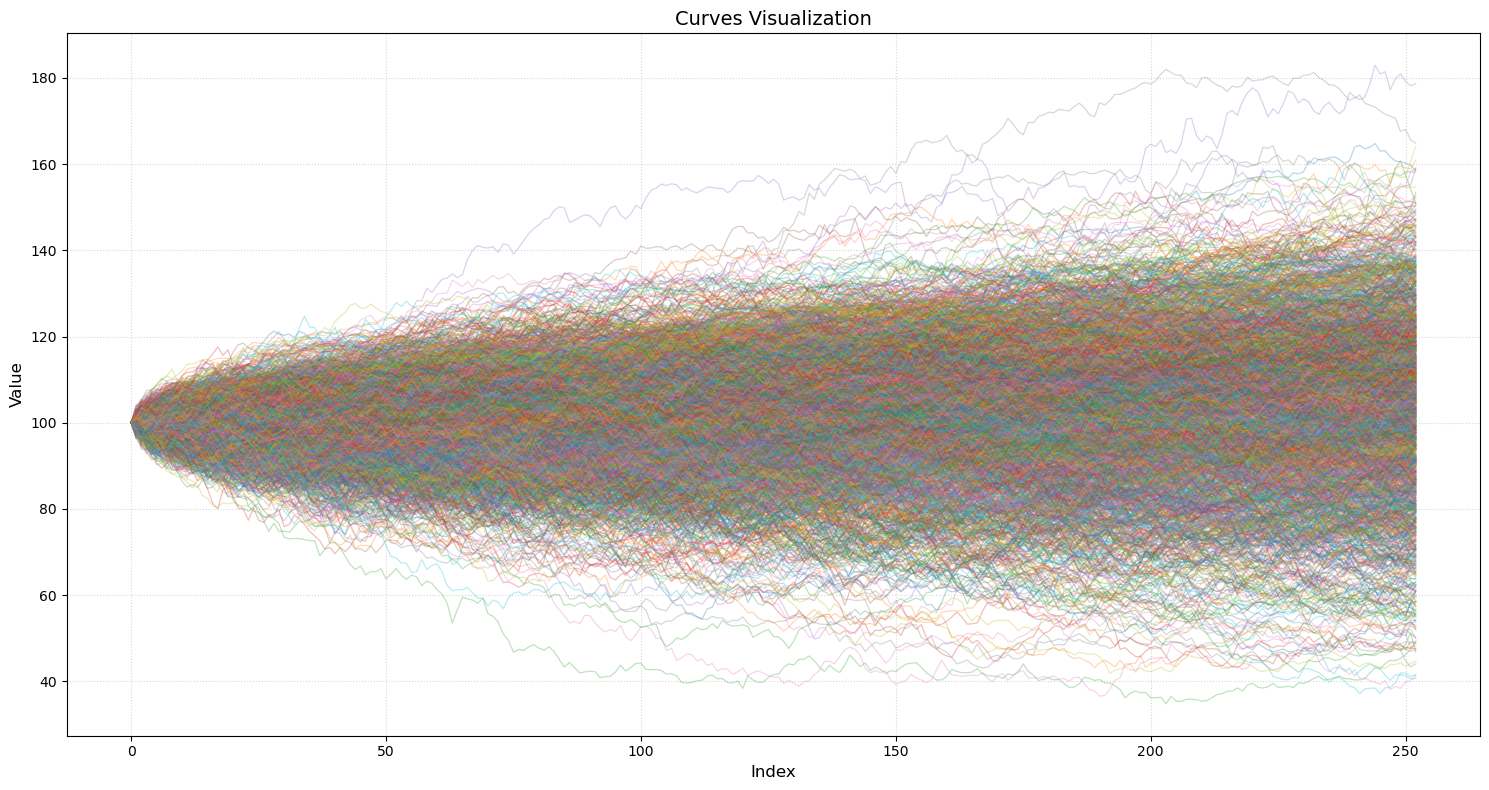

In [9]:
from src.utils import plot_fig
# print('quantlib')
# plot_fig(ql_paths)
print('numpy')
plot_fig(S)

In [16]:
#
ql_calendar.set_today(start_date)
npvs = []
for prices in S.T:
    print(f'today: {ql_calendar.today}')
    ql_stocks.set_one_day_prices(prices)
    npvs.append(ql_options.NPV()['NPV'].values)
    
    ql_calendar.to_next_trading_date()
all_npvs = np.array(npvs)
print()

today:  January 3rd, 2023
today: January 3rd, 2023
today: January 4th, 2023
today: January 5th, 2023
today: January 6th, 2023
today: January 9th, 2023
today: January 10th, 2023
today: January 11th, 2023
today: January 12th, 2023
today: January 13th, 2023
today: January 16th, 2023
today: January 17th, 2023
today: January 18th, 2023
today: January 19th, 2023
today: January 20th, 2023
today: January 26th, 2023
today: January 27th, 2023
today: January 30th, 2023
today: January 31st, 2023
today: February 1st, 2023
today: February 2nd, 2023
today: February 3rd, 2023
today: February 6th, 2023
today: February 7th, 2023
today: February 8th, 2023
today: February 9th, 2023
today: February 10th, 2023
today: February 13th, 2023
today: February 14th, 2023
today: February 15th, 2023
today: February 16th, 2023
today: February 17th, 2023
today: February 20th, 2023
today: February 21st, 2023
today: February 22nd, 2023
today: February 23rd, 2023
today: February 24th, 2023
today: February 27th, 2023
today

In [18]:
all_npvs.shape

(253, 2000)

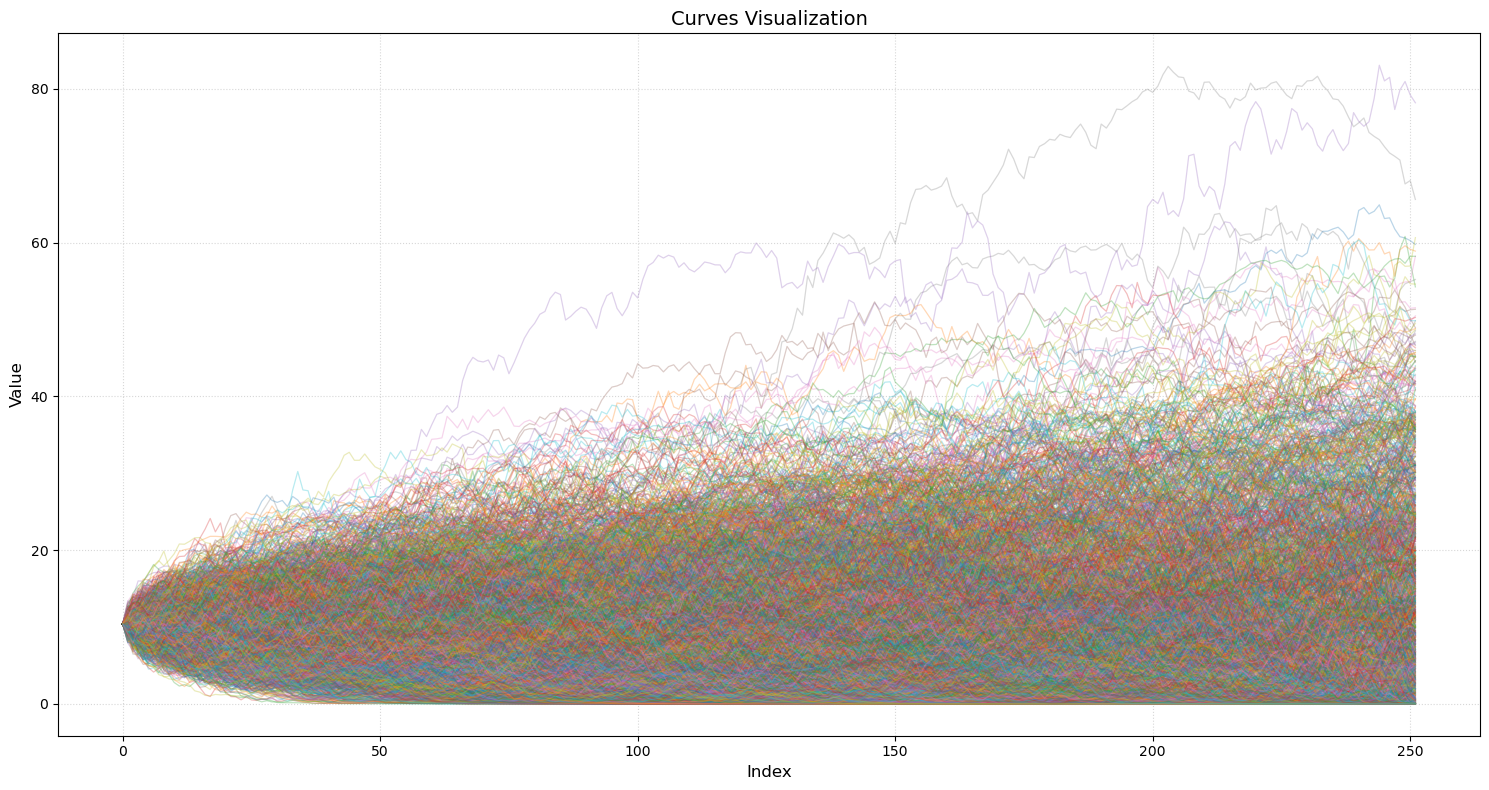

In [19]:
plot_fig(all_npvs[:-1].T)